In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer  #convert text data into numerial values
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# data collection and preprocessing


In [2]:
#import the dataset
data=pd.read_csv("mail_data.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#top 5 row
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Shape of the data
data.shape

(5572, 2)

In [5]:
#Describe the data
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# Exploretory dataanalysis

In [6]:
#Check the null values in the data
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# replace null values with null strings
data1=data.where((pd.notnull(data)),'')

In [8]:
data.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [9]:
#Check the duplicate value
data.duplicated().sum()

415

In [10]:
#Drop the duplicate values
data= data.drop_duplicates(keep='first')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.duplicated().sum()

0

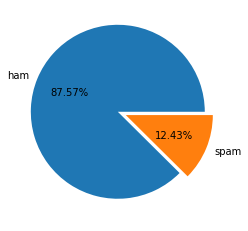

In [12]:
plt.pie(data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

# Label Encoding

In [13]:
# Spam mail as 0 ; Ham mail as 1
data.loc[data['Category']=='spam','Category']=0
data.loc[data['Category']=='ham','Category']=1

In [14]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# split the data  

In [15]:
x=data['Message']
y=data['Category']

In [16]:
print(x.shape)
print(y.shape)

(5157,)
(5157,)


In [17]:
#Train and test the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [18]:
print(x_train.shape)
print(x_test.shape)

(4125,)
(1032,)


# Feature Extraction

In [19]:
#Tfidf function is used to convert the textual data to numerical data  ,  min_df:<1-ignore words >1: taken,
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [20]:
print(feature_extraction)

TfidfVectorizer(lowercase='True', stop_words='english')


In [21]:
x_train_feature=feature_extraction.fit_transform(x_train)
x_test_feature=feature_extraction.transform(x_test)

In [22]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [23]:
print(x_train_feature)


  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

In [24]:
print(x_test_feature)

  (0, 6086)	0.3944231765529361
  (0, 4738)	0.32748577740962176
  (0, 4018)	0.33853958897969616
  (0, 3886)	0.41026591111704
  (0, 1518)	0.6739853501828288
  (1, 6643)	0.34343632198724217
  (1, 4277)	0.6049436351033556
  (1, 3080)	0.3405927969937548
  (1, 874)	0.6325276576749704
  (2, 7259)	0.8099051408446086
  (2, 5662)	0.5865608773464819
  (3, 854)	1.0
  (4, 7330)	0.1709848146862032
  (4, 7157)	0.22907651727073883
  (4, 7049)	0.2351824570884995
  (4, 6857)	0.18128246190114575
  (4, 6828)	0.15580311274041234
  (4, 6802)	0.24712748312101787
  (4, 6668)	0.2755034460856627
  (4, 6556)	0.20586305286327689
  (4, 6255)	0.31681116547744975
  (4, 4927)	0.24712748312101787
  (4, 4720)	0.20728837222143673
  (4, 3393)	0.22160345089830902
  (4, 3329)	0.26586898786839125
  :	:
  (1027, 6925)	0.16321241341070308
  (1027, 6813)	0.3158063487602124
  (1027, 6605)	0.23500573210717166
  (1027, 6098)	0.27669654882822414
  (1027, 5753)	0.2799727568730548
  (1027, 4786)	0.33671482458181523
  (1027, 4453)	0.

In [25]:
model=LogisticRegression()
model.fit(x_train_feature,y_train)

LogisticRegression()

In [26]:
#Evaluate the trained model
#Pridict the trained model
prediction_train=model.predict(x_train_feature)

In [27]:
accuracy=accuracy_score(y_train,prediction_train)
print("accuracy for training data",accuracy)

accuracy for training data 0.961939393939394


In [28]:
# prediction on x_test
prediction_test=model.predict(x_test_feature)
accuracy=accuracy_score(y_test,prediction_test)
print("accuracy for testing data",accuracy)

accuracy for testing data 0.9544573643410853


# Build the predictive model

In [29]:
input_mail=['Go until jurong point, crazy.. Available only']
input_data_feature=feature_extraction.transform(input_mail)
input_prediction=model.predict(input_data_feature)
print(input_prediction)


if input_prediction[0]==1:
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail
